# Study Case

The objective of the assignment is to use the following data set to **provide advice to a client of your choosing**. The data set is Crash Stats - Data Extract - Datasets - Victorian Government Data Directory. This is public data was collected on the web and is not related to any work we currently undertake.

**We would like you to investigate, analyse it and prepare a presentation.** You may also supplement the analysis with additional data as you see fit, but the core analysis should be focused on the crashes.

# Data Analysis

In [1]:
# Standard imports

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

In [7]:
df_acc = pd.read_csv('data/acc_dataset.csv')
df_acc.head()

,ACCIDENT_NO,ACCIDENT_DATE_TIME,ACCIDENT_TYPE,Accident Type Desc,DAY_OF_WEEK,Day Week Description,DCA_CODE,DCA Description,LIGHT_CONDITION,Light Condition Desc,...,ROAD_GEOMETRY,Road Geometry Desc,SPEED_ZONE,MEAN_AGE,MEAN_VEHI_YEAR_MANUF,ROAD_SURFACE_TYPE,ATMOSPH_COND,Atmosph Cond Desc,SURFACE_COND,Surface Cond Desc
0,T20060000010,2006-01-13 12:42:00,1,Collision with vehicle,6,Friday,113,RIGHT NEAR (INTERSECTIONS ONLY),1,Day,...,1,Cross intersection,60,47.600000,2000.0,1.0,1,Clear,1,Dry
1,T20060000018,2006-01-13 19:10:00,1,Collision with vehicle,6,Friday,113,RIGHT NEAR (INTERSECTIONS ONLY),1,Day,...,2,T intersection,70,21.500000,1994.5,1.0,1,Clear,1,Dry
2,T20060000022,2006-01-14 12:10:00,7,Fall from or in moving vehicle,7,Saturday,190,FELL IN/FROM VEHICLE,1,Day,...,5,Not at intersection,100,47.500000,1995.0,1.0,1,Clear,1,Dry
3,T20060000023,2006-01-14 11:49:00,1,Collision with vehicle,7,Saturday,130,REAR END(VEHICLES IN SAME LANE),1,Day,...,2,T intersection,80,42.500000,2000.5,1.0,1,Clear,1,Dry
4,T20060000026,2006-01-14 10:45:00,1,Collision with vehicle,7,Saturday,121,RIGHT THROUGH,1,Day,...,5,Not at intersection,50,57.666667,1991.0,1.0,1,Clear,1,Dry


## Basic statistics

In [8]:
df_acc.describe()

,ACCIDENT_TYPE,DAY_OF_WEEK,DCA_CODE,LIGHT_CONDITION,NODE_ID,NO_OF_VEHICLES,NO_PERSONS,NO_PERSONS_INJ_2,NO_PERSONS_INJ_3,NO_PERSONS_KILLED,NO_PERSONS_NOT_INJ,ROAD_GEOMETRY,SPEED_ZONE,MEAN_AGE,MEAN_VEHI_YEAR_MANUF,ROAD_SURFACE_TYPE,ATMOSPH_COND,SURFACE_COND
count,203708.000000,203708.000000,203708.000000,203708.000000,203708.000000,203708.000000,203708.000000,203708.000000,203708.000000,203708.000000,203708.000000,203708.000000,203708.000000,203185.000000,197718.000000,203708.000000,203708.000000,203708.000000
mean,2.262106,3.975283,139.295487,1.834675,190955.262096,1.792998,2.410328,0.400240,0.862435,0.019803,1.127575,3.351965,121.605995,38.538657,1910.063062,1.169267,1.740153,1.579128
std,2.002073,1.990020,26.479004,1.540046,151789.148066,0.749319,1.502407,0.633963,0.779561,0.155349,1.313800,1.780496,216.078965,14.455368,350.919690,0.799000,2.104480,1.770274
min,1.000000,0.000000,100.000000,1.000000,-10.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,30.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,1.000000,2.000000,120.000000,1.000000,43723.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,2.000000,60.000000,27.250000,1997.000000,1.000000,1.000000,1.000000
50%,1.000000,4.000000,130.000000,1.000000,218026.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,5.000000,60.000000,36.500000,2003.000000,1.000000,1.000000,1.000000
75%,4.000000,6.000000,171.000000,2.000000,281585.250000,2.000000,3.000000,1.000000,1.000000,0.000000,1.000000,5.000000,80.000000,47.500000,2007.333333,1.000000,1.000000,1.000000
max,9.000000,7.000000,199.000000,9.000000,666096.000000,21.000000,97.000000,17.000000,43.000000,11.000000,87.000000,9.000000,999.000000,101.000000,2502.500000,9.000000,9.000000,9.000000


In [9]:
df_acc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203708 entries, 0 to 203707
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ACCIDENT_NO           203708 non-null  object 
 1   ACCIDENT_DATE_TIME    203708 non-null  object 
 2   ACCIDENT_TYPE         203708 non-null  int64  
 3   Accident Type Desc    203708 non-null  object 
 4   DAY_OF_WEEK           203708 non-null  int64  
 5   Day Week Description  203708 non-null  object 
 6   DCA_CODE              203708 non-null  int64  
 7   DCA Description       203708 non-null  object 
 8   LIGHT_CONDITION       203708 non-null  int64  
 9   Light Condition Desc  203708 non-null  object 
 10  NODE_ID               203708 non-null  int64  
 11  NO_OF_VEHICLES        203708 non-null  int64  
 12  NO_PERSONS            203708 non-null  int64  
 13  NO_PERSONS_INJ_2      203708 non-null  int64  
 14  NO_PERSONS_INJ_3      203708 non-null  int64  
 15  

## Dealing with null values

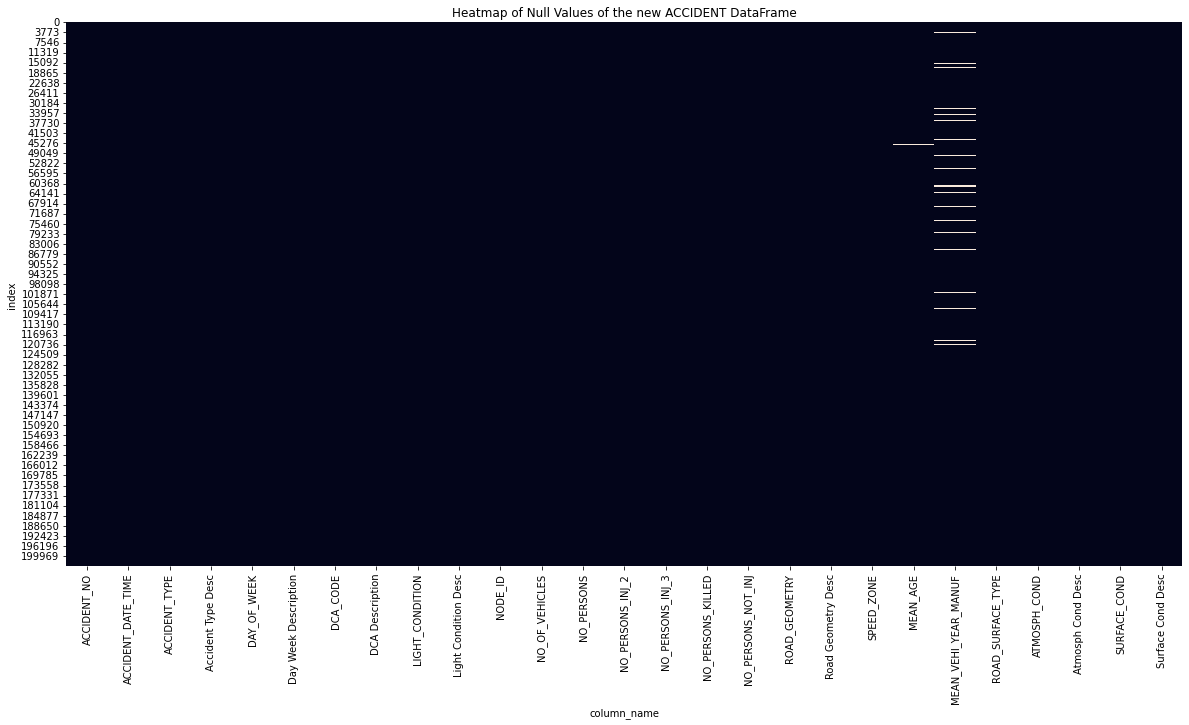

In [10]:
plt.figure(figsize=(20,10))
sns.heatmap(df_acc.isnull(), cbar=False)
plt.ylabel('index')
plt.xlabel('column_name')
plt.title(f'Heatmap of Null Values of the new ACCIDENT DataFrame')
plt.show()

**MEAN_AGE:** drop samples with null values

**MEAN_VEHI_YEAR_MANUF:** impute with a median strategy

In [12]:
# Mean Age
df_acc = df_acc[df_acc["MEAN_AGE"].notna()]

In [ ]:
# Mean vehicle year manufacturing
from sklearn.impute import SimpleImputer

SI = SimpleImputer(strategy='median')
df_acc.MEAN_VEHI_YEAR_MANUF = SI.fit_transform(df_acc["MEAN_VEHI_YEAR_MANUF"].values.reshape(-1,1))

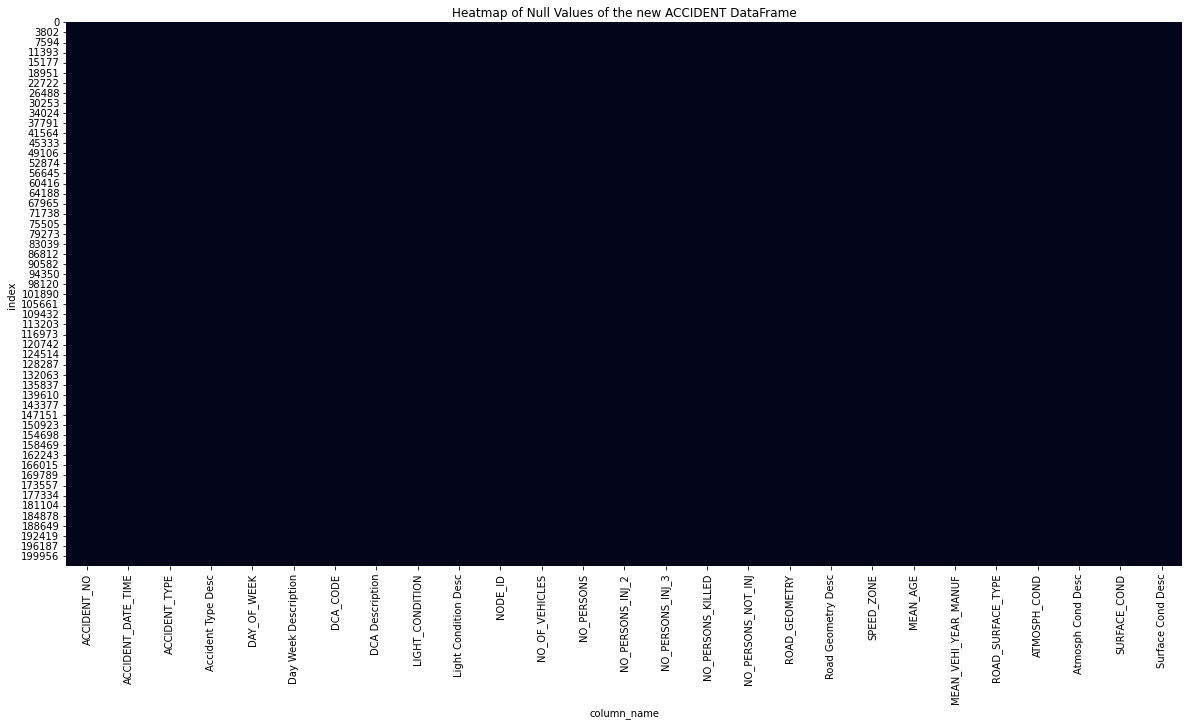

In [14]:
plt.figure(figsize=(20,10))
sns.heatmap(df_acc.isnull(), cbar=False)
plt.ylabel('index')
plt.xlabel('column_name')
plt.title(f'Heatmap of Null Values of the new ACCIDENT DataFrame')
plt.show()

No null values anymore !

In [15]:
df_acc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 203185 entries, 0 to 203707
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ACCIDENT_NO           203185 non-null  object 
 1   ACCIDENT_DATE_TIME    203185 non-null  object 
 2   ACCIDENT_TYPE         203185 non-null  int64  
 3   Accident Type Desc    203185 non-null  object 
 4   DAY_OF_WEEK           203185 non-null  int64  
 5   Day Week Description  203185 non-null  object 
 6   DCA_CODE              203185 non-null  int64  
 7   DCA Description       203185 non-null  object 
 8   LIGHT_CONDITION       203185 non-null  int64  
 9   Light Condition Desc  203185 non-null  object 
 10  NODE_ID               203185 non-null  int64  
 11  NO_OF_VEHICLES        203185 non-null  int64  
 12  NO_PERSONS            203185 non-null  int64  
 13  NO_PERSONS_INJ_2      203185 non-null  int64  
 14  NO_PERSONS_INJ_3      203185 non-null  int64  
 15  

## Time and Speed zone analysis

In this section, the data analysis will be focused on the time and speed zone.

In [23]:
df_acc = df_acc[df_acc["SPEED_ZONE"] <= 400]

<AxesSubplot:xlabel='SPEED_ZONE', ylabel='Count'>

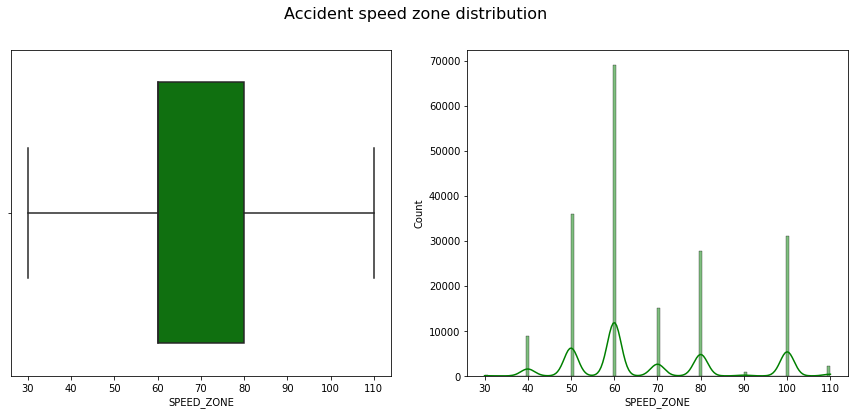

In [30]:
fig, ax = plt.subplots(1, 2, figsize=(15,6))
fig.suptitle('Accident speed zone distribution', fontsize='16')

# 1st Graph
sns.boxplot(x=df_acc["SPEED_ZONE"], color='g', ax=ax[0])

# 2nd Graph
sns.histplot(df_acc["SPEED_ZONE"], stat='count', kde=True, color='g', ax=ax[1])

We can clearly see that most of the accidents are in the average speed zone limitation (between 60 to 80 km/h).

In [34]:
df_acc.groupby("Day Week Description").count()

,ACCIDENT_NO,ACCIDENT_DATE_TIME,ACCIDENT_TYPE,Accident Type Desc,DAY_OF_WEEK,DCA_CODE,DCA Description,LIGHT_CONDITION,Light Condition Desc,NODE_ID,...,ROAD_GEOMETRY,Road Geometry Desc,SPEED_ZONE,MEAN_AGE,MEAN_VEHI_YEAR_MANUF,ROAD_SURFACE_TYPE,ATMOSPH_COND,Atmosph Cond Desc,SURFACE_COND,Surface Cond Desc
Day Week Description,,,,,,,,,,,,,,,,,,,,,
Friday,30450,30450,30450,30450,30450,30450,30450,30450,30450,30450,...,30450,30450,30450,30450,30450,30450,30450,30450,30450,30450
Monday,25816,25816,25816,25816,25816,25816,25816,25816,25816,25816,...,25816,25816,25816,25816,25816,25816,25816,25816,25816,25816
Saturday,26744,26744,26744,26744,26744,26744,26744,26744,26744,26744,...,26744,26744,26744,26744,26744,26744,26744,26744,26744,26744
Sunday,23285,23285,23285,23285,23285,23285,23285,23285,23285,23285,...,23285,23285,23285,23285,23285,23285,23285,23285,23285,23285
Thursday,29317,29317,29317,29317,29317,29317,29317,29317,29317,29317,...,29317,29317,29317,29317,29317,29317,29317,29317,29317,29317
Tuesday,27459,27459,27459,27459,27459,27459,27459,27459,27459,27459,...,27459,27459,27459,27459,27459,27459,27459,27459,27459,27459
Wednesday,28258,28258,28258,28258,28258,28258,28258,28258,28258,28258,...,28258,28258,28258,28258,28258,28258,28258,28258,28258,28258


In [48]:
df_acc = df_acc[df_acc["DAY_OF_WEEK"] != 0]

In [59]:
df_acc.groupby("Day Week Description").mean()

,ACCIDENT_TYPE,DAY_OF_WEEK,DCA_CODE,LIGHT_CONDITION,NODE_ID,NO_OF_VEHICLES,NO_PERSONS,NO_PERSONS_INJ_2,NO_PERSONS_INJ_3,NO_PERSONS_KILLED,NO_PERSONS_NOT_INJ,ROAD_GEOMETRY,SPEED_ZONE,MEAN_AGE,MEAN_VEHI_YEAR_MANUF,ROAD_SURFACE_TYPE,ATMOSPH_COND,SURFACE_COND
Day Week Description,,,,,,,,,,,,,,,,,,
Friday,2.098621,5.863087,137.369228,1.828374,186733.213005,1.836322,2.475698,0.398522,0.871954,0.020854,1.184269,3.298161,67.659934,38.645728,1919.641307,1.101546,1.642660,1.478194
Monday,2.138093,1.866401,138.182871,1.724589,187331.820344,1.818756,2.390920,0.390765,0.867137,0.020375,1.112333,3.285482,67.960954,38.863576,1921.796712,1.098979,1.615316,1.446584
Saturday,2.517462,6.873504,142.703859,1.923572,193433.906895,1.710215,2.529876,0.460290,0.867110,0.025501,1.176899,3.435761,69.239456,37.162232,1923.608183,1.146721,1.591048,1.431087
Sunday,2.739605,1.001378,145.411160,1.924224,183206.837918,1.657531,2.498056,0.507996,0.840378,0.029376,1.120356,3.521084,70.867244,36.705113,1943.494046,1.149597,1.508882,1.390297
Thursday,2.027117,4.864993,136.510148,1.774158,185208.015895,1.867551,2.423133,0.386568,0.861207,0.018965,1.156053,3.248559,67.175018,39.192145,1911.235937,1.089012,1.644711,1.476379
Tuesday,2.049783,2.863469,136.813577,1.729961,185850.476856,1.854255,2.383772,0.377909,0.862668,0.017772,1.124659,3.266798,67.032303,39.207496,1913.252239,1.098265,1.618559,1.443425
Wednesday,2.041581,3.867683,136.734270,1.750124,186363.688725,1.857881,2.405938,0.382547,0.863118,0.017765,1.142225,3.283000,67.233350,39.048471,1914.983389,1.096147,1.641624,1.462949


<AxesSubplot:title={'center':'Accident distribution according to the week days'}, xlabel='Day Week Description', ylabel='Count'>

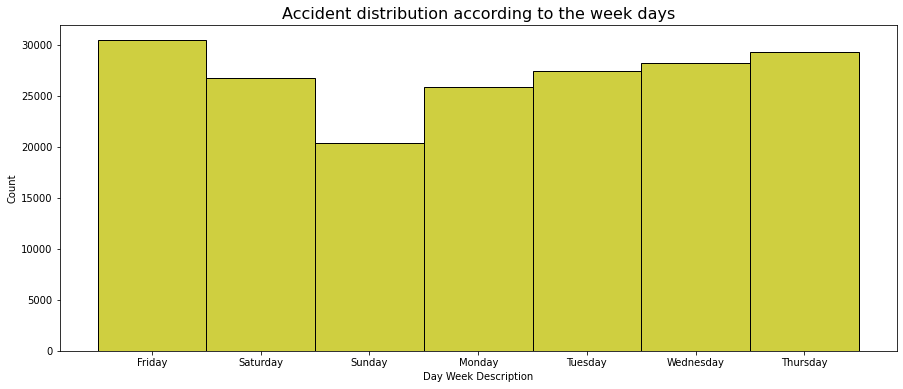

In [68]:
days_week = {
    "Monday": 2,
    "Tuesday": 3,
    "Wednesday": 4,
    "Thursday": 5,
    "Friday": 6,
    "Saturday": 7,
    "Sunday": 1,
}

x_label = [f'{day[:3]} ({nb_day})' for day, nb_day in days_week.items()]

plt.figure(figsize=(15,6))
plt.title('Accident distribution according to the week days', fontsize='16')
sns.histplot(df_acc["Day Week Description"], stat='count', kde=False, color='y')

Highest number of accident on fridays (day 6). Let's now focus on the hours.

In [ ]:
day_timing = [[pd.to_datetime(f'{i}:00:00', format='%H:%M:%S'), pd.to_datetime(f'{i+2}:00:00', format='%H:%M:%S')] for i in range(0,22,2)]
day_timing.append([pd.to_datetime('22:00:00', format='%H:%M:%S'), pd.to_datetime('00:00:00', format='%H:%M:%S')])
day_timing

dic = {f'{i*2}-{(i*2)+2}h': timing for i, timing in enumerate(day_timing)}
dic

In [ ]:
df_acc.ACCIDENT_DATE_TIME = pd.to_datetime(df_acc.ACCIDENT_DATE_TIME)
df_acc.head()

In [96]:
conditions = {
    '0-2h': (0 <= df_acc["ACCIDENT_DATE_TIME"].dt.hour) & (df_acc["ACCIDENT_DATE_TIME"].dt.hour < 2),
    '2-4h': (2 <= df_acc["ACCIDENT_DATE_TIME"].dt.hour) & (df_acc["ACCIDENT_DATE_TIME"].dt.hour < 4),
    '4-6h':(4 <= df_acc["ACCIDENT_DATE_TIME"].dt.hour) & (df_acc["ACCIDENT_DATE_TIME"].dt.hour < 6),
    '6-8h': (6 <= df_acc["ACCIDENT_DATE_TIME"].dt.hour) & (df_acc["ACCIDENT_DATE_TIME"].dt.hour < 8),
    '8-10h': (8 <= df_acc["ACCIDENT_DATE_TIME"].dt.hour) & (df_acc["ACCIDENT_DATE_TIME"].dt.hour < 10),
    '10-12h': (10 <= df_acc["ACCIDENT_DATE_TIME"].dt.hour) & (df_acc["ACCIDENT_DATE_TIME"].dt.hour < 12),
    '12-14h': (12 <= df_acc["ACCIDENT_DATE_TIME"].dt.hour) & (df_acc["ACCIDENT_DATE_TIME"].dt.hour < 14),
    '14-16h': (14 <= df_acc["ACCIDENT_DATE_TIME"].dt.hour) & (df_acc["ACCIDENT_DATE_TIME"].dt.hour < 16),
    '16-18h': (16 <= df_acc["ACCIDENT_DATE_TIME"].dt.hour) & (df_acc["ACCIDENT_DATE_TIME"].dt.hour < 18),
    '18-20h': (18 <= df_acc["ACCIDENT_DATE_TIME"].dt.hour) & (df_acc["ACCIDENT_DATE_TIME"].dt.hour < 20),
    '20-22h': (20 <= df_acc["ACCIDENT_DATE_TIME"].dt.hour) & (df_acc["ACCIDENT_DATE_TIME"].dt.hour < 22),
    '22-24h': (22 <= df_acc["ACCIDENT_DATE_TIME"].dt.hour) & (df_acc["ACCIDENT_DATE_TIME"].dt.hour < 24)
}

df_acc.insert(2, 'ACCIDENT_TIMEZONE', np.select(conditions.values(), conditions.keys()))
df_acc.head()

,ACCIDENT_NO,ACCIDENT_DATE_TIME,ACCIDENT_TIMEZONE,ACCIDENT_TYPE,Accident Type Desc,DAY_OF_WEEK,Day Week Description,DCA_CODE,DCA Description,LIGHT_CONDITION,...,ROAD_GEOMETRY,Road Geometry Desc,SPEED_ZONE,MEAN_AGE,MEAN_VEHI_YEAR_MANUF,ROAD_SURFACE_TYPE,ATMOSPH_COND,Atmosph Cond Desc,SURFACE_COND,Surface Cond Desc
0,T20060000010,2006-01-13 12:42:00,12-14h,1,Collision with vehicle,6,Friday,113,RIGHT NEAR (INTERSECTIONS ONLY),1,...,1,Cross intersection,60,47.600000,2000.0,1.0,1,Clear,1,Dry
1,T20060000018,2006-01-13 19:10:00,18-20h,1,Collision with vehicle,6,Friday,113,RIGHT NEAR (INTERSECTIONS ONLY),1,...,2,T intersection,70,21.500000,1994.5,1.0,1,Clear,1,Dry
2,T20060000022,2006-01-14 12:10:00,12-14h,7,Fall from or in moving vehicle,7,Saturday,190,FELL IN/FROM VEHICLE,1,...,5,Not at intersection,100,47.500000,1995.0,1.0,1,Clear,1,Dry
3,T20060000023,2006-01-14 11:49:00,10-12h,1,Collision with vehicle,7,Saturday,130,REAR END(VEHICLES IN SAME LANE),1,...,2,T intersection,80,42.500000,2000.5,1.0,1,Clear,1,Dry
4,T20060000026,2006-01-14 10:45:00,10-12h,1,Collision with vehicle,7,Saturday,121,RIGHT THROUGH,1,...,5,Not at intersection,50,57.666667,1991.0,1.0,1,Clear,1,Dry


<AxesSubplot:title={'center':'Accident distribution according to the timezones'}, xlabel='ACCIDENT_TIMEZONE', ylabel='Count'>

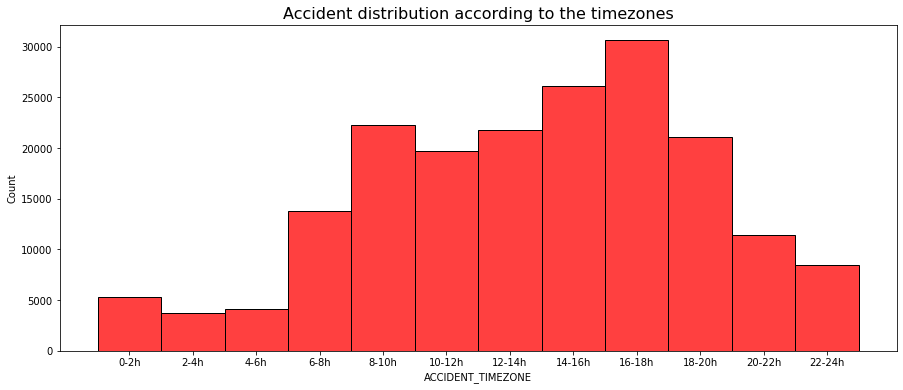

In [106]:
plt.figure(figsize=(15,6))
plt.title('Accident distribution according to the timezones', fontsize='16')
sns.histplot(df_acc.sort_values(by="ACCIDENT_DATE_TIME")["ACCIDENT_TIMEZONE"], stat='count', color='r')

The highest frequencies are between 14-16h and 16-18h. That might be rush hour but for more details we should see the other conditions like weather or road situation that might have effect on accidents.

## Accident type

<AxesSubplot:xlabel='Count', ylabel='Accident Type Desc'>

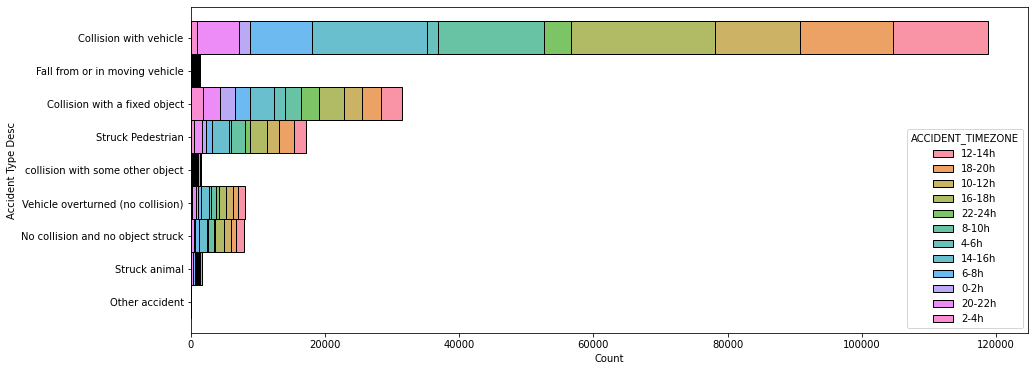

In [170]:
plt.figure(figsize=(15,6))
sns.histplot(data=df_acc, y=df_acc["Accident Type Desc"] , hue="ACCIDENT_TIMEZONE", multiple='stack')

Quite a bit hard to explain

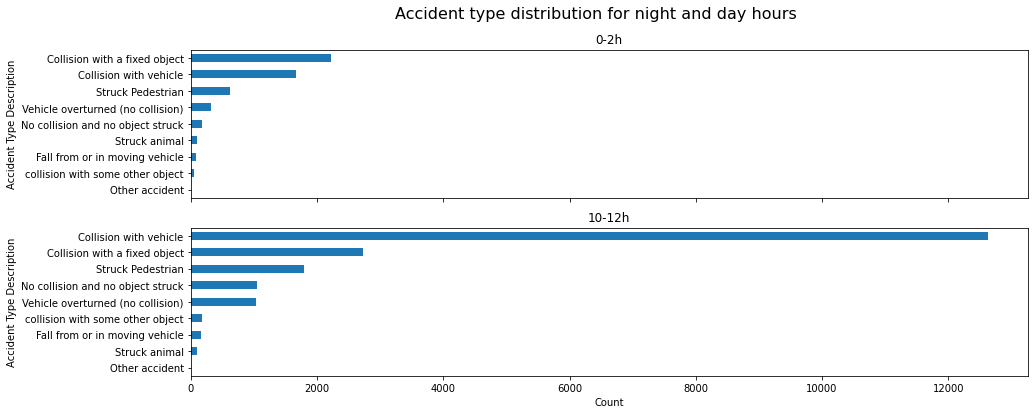

In [171]:
fig, axs = plt.subplots(2, figsize=(15,6), sharex=True)
fig.suptitle('Accident type distribution for night and day hours', fontsize='16')

axs[0].set(ylabel= "Accident Type Description")
axs[0].set_title('0-2h')
df_acc[df_acc["ACCIDENT_TIMEZONE"] == '0-2h']["Accident Type Desc"].value_counts().sort_values().plot(kind= "barh", ax=axs[0])


df_acc[df_acc["ACCIDENT_TIMEZONE"] == '10-12h']["Accident Type Desc"].value_counts().sort_values().plot(kind= "barh", ax=axs[1])
axs[1].set_title('10-12h')
axs[1].set(xlabel= "Count", ylabel= "Accident Type Description")

plt.show()

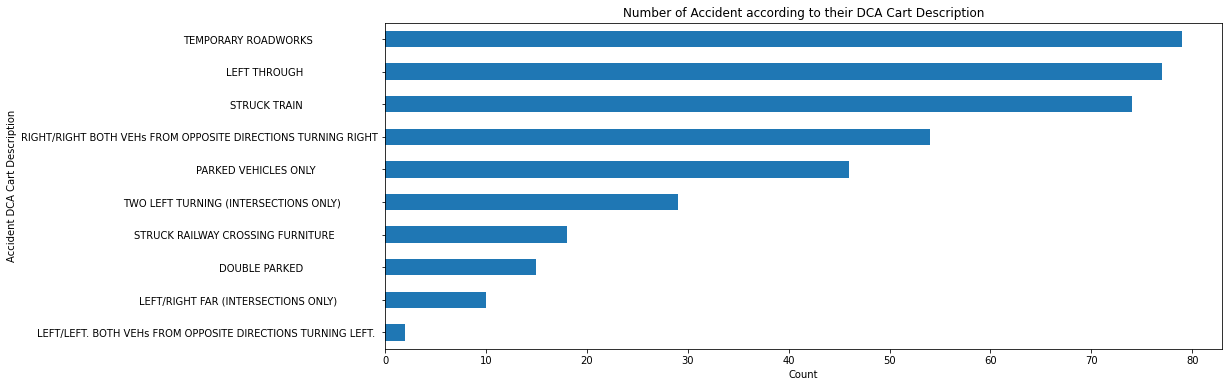

In [180]:
plt.figure(figsize=(15,6))
plt.title("Number of Accident according to their DCA Cart Description")
df_acc["DCA Description"].value_counts().sort_values().iloc[:10].plot(kind= "barh")
plt.xlabel("Count")
plt.ylabel("Accident DCA Cart Description")
plt.show()

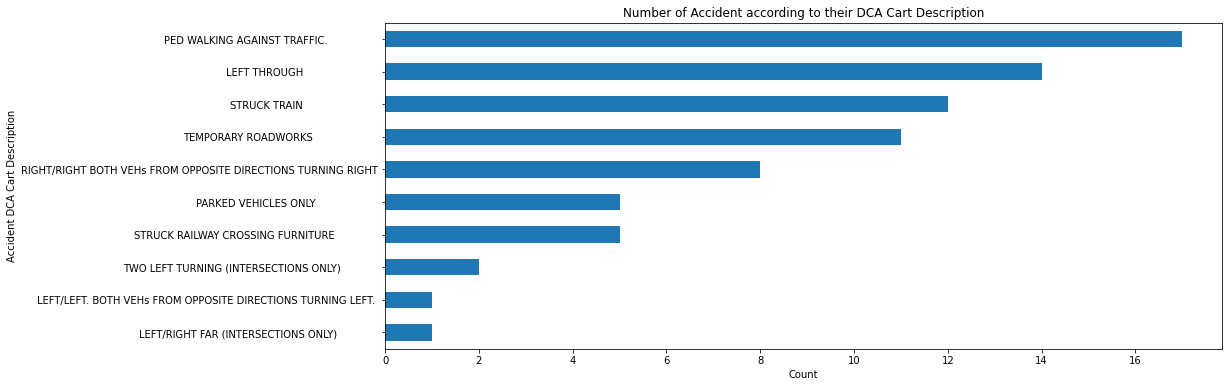

In [179]:
df_acc_16_18 = df_acc[df_acc["ACCIDENT_TIMEZONE"] == '16-18h']
plt.figure(figsize=(15,6))
plt.title("Number of Accident according to their DCA Cart Description")
df_acc_16_18["DCA Description"].value_counts().sort_values().iloc[:10].plot(kind= "barh")
plt.xlabel("Count")
plt.ylabel("Accident DCA Cart Description")
plt.show()

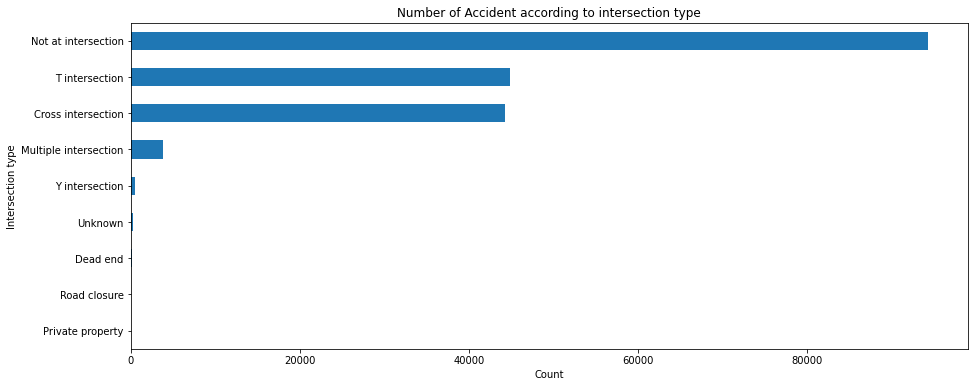

In [182]:
plt.figure(figsize=(15,6))
plt.title("Number of Accident according to intersection type")
df_acc["Road Geometry Desc"].value_counts().sort_values().plot(kind= "barh")
plt.xlabel("Count")
plt.ylabel("Intersection type")
plt.show()

We see that roads with T-intersections are more prone to accidents than roads with Y-intersections.

One solution might be to convert the T-joint to a Y-joint.

## Weather Impact

<AxesSubplot:xlabel='Light Condition Desc', ylabel='Count'>

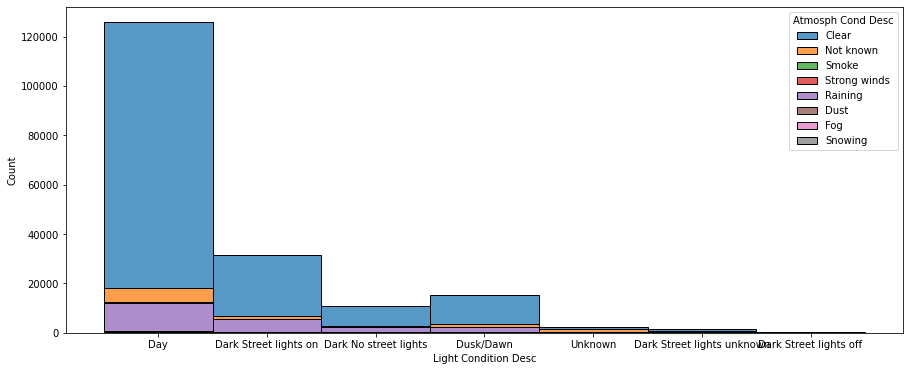

In [187]:
plt.figure(figsize=(15,6))
sns.histplot(data=df_acc, x="Light Condition Desc", hue="Atmosph Cond Desc", multiple="stack")

For most of the accidents, the bad weather isn't very related. Most of them were done during good conditions.

## Road surface impact

<AxesSubplot:xlabel='Surface Cond Desc', ylabel='Count'>

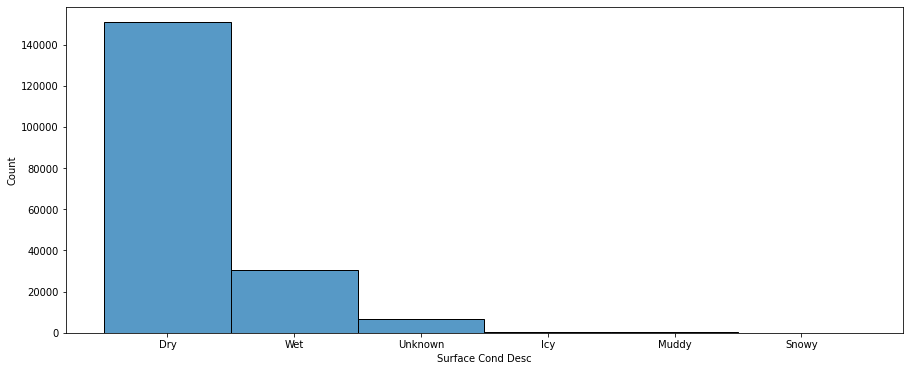

In [190]:
plt.figure(figsize=(15,6))
sns.histplot(df_acc, x="Surface Cond Desc")

Most of the accident were done on good driving accident.

## Number of accident trading

> Might have been done before maybe

In [192]:
df_acc.insert(3, "ACCIDENT_YEAR", df_acc.ACCIDENT_DATE_TIME.dt.year)
df_acc.head()

,ACCIDENT_NO,ACCIDENT_DATE_TIME,ACCIDENT_TIMEZONE,ACCIDENT_YEAR,ACCIDENT_TYPE,Accident Type Desc,DAY_OF_WEEK,Day Week Description,DCA_CODE,DCA Description,...,ROAD_GEOMETRY,Road Geometry Desc,SPEED_ZONE,MEAN_AGE,MEAN_VEHI_YEAR_MANUF,ROAD_SURFACE_TYPE,ATMOSPH_COND,Atmosph Cond Desc,SURFACE_COND,Surface Cond Desc
0,T20060000010,2006-01-13 12:42:00,12-14h,2006,1,Collision with vehicle,6,Friday,113,RIGHT NEAR (INTERSECTIONS ONLY),...,1,Cross intersection,60,47.600000,2000.0,1.0,1,Clear,1,Dry
1,T20060000018,2006-01-13 19:10:00,18-20h,2006,1,Collision with vehicle,6,Friday,113,RIGHT NEAR (INTERSECTIONS ONLY),...,2,T intersection,70,21.500000,1994.5,1.0,1,Clear,1,Dry
2,T20060000022,2006-01-14 12:10:00,12-14h,2006,7,Fall from or in moving vehicle,7,Saturday,190,FELL IN/FROM VEHICLE,...,5,Not at intersection,100,47.500000,1995.0,1.0,1,Clear,1,Dry
3,T20060000023,2006-01-14 11:49:00,10-12h,2006,1,Collision with vehicle,7,Saturday,130,REAR END(VEHICLES IN SAME LANE),...,2,T intersection,80,42.500000,2000.5,1.0,1,Clear,1,Dry
4,T20060000026,2006-01-14 10:45:00,10-12h,2006,1,Collision with vehicle,7,Saturday,121,RIGHT THROUGH,...,5,Not at intersection,50,57.666667,1991.0,1.0,1,Clear,1,Dry


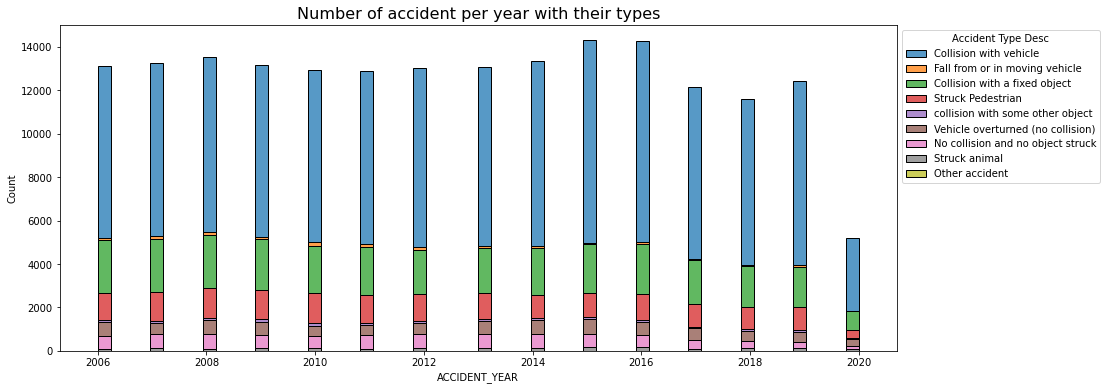

In [207]:
plt.figure(figsize=(15,6))
h = sns.histplot(data=df_acc, x="ACCIDENT_YEAR", hue="Accident Type Desc", multiple="stack")
sns.move_legend(h, "upper left", bbox_to_anchor=(1, 1))
plt.title("Number of accident per year with their types", fontsize=16)
plt.show()

The number of accident is trending downwards (specially in 2020 due to COVID-19).